# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## План работы
### Цель исследования

Познакомиться с рынком недвижимости и узнать какие факторы влияют на конечную стоимость объектов. Полученная информация в ходе исследования будет полезной для создания автоматизированной системы, которая поможет выявлять закономерности, аномалии и мошенические действия.

### Особенности данных

Данные были предоставлены сервисом Яндекс.Недвижимость в виде архива объявлений, которые можно разделить на два типа:

  **1. пользовательские (выбранные пользователем вручную)**

  **2. автоматические (полученные на основе картографических данных)**

### План работы и задачи

В соответствии с поставленной целью и имеющимися данными, был определен следующий план работы:

 **I Произвести предоработку данных:**
 
    - выявить пропуски, аномалии, дубликаты;
    - выбрать способ устранения таких данных(заменить, удалить и т.д.);
    - привести данные к одному типу;
    
**II Добавить в данные следующие столбцы:**

    - цена одного квадратного метра;
    - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
    - месяц публикации объявления;
    - год публикации объявления;
    - тип этажа квартиры (значения — «первый», «последний», «другой»);
    - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
    
 **III Провести исследовательский анализ данных:**
 
    - Изучить параметры объектов;
    - Построить отдельные гистограммы для каждого из них;
    - Изучить, как быстро продавались квартиры;
    - Оценить какие факторы больше всего влияют на общую (полную) стоимость объекта;
    - Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты       с самой высокой и низкой стоимостью квадратного метра. 
    
 **IV. Сделать выводы на основе проведенных исследований.**
    

## Изучение данных и предоработка данных

In [1]:
# Импорт библиотек 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', 50)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Промежуточные выводы по изучению данных

#### **Ошибки в типах данных:**
- __first_day_exposition__ привести к типу __datetime__
- __floors_total__ привести к типу __int__
- __is_apartment__ приветсти к типу __bool__
- __balcony__ привести к типу __int__
- __airport_nearest__ привести к типу __int__
- __days_exposition__ привести к типу __int__
- __cityCenter_nearest__ переименовать в __city_center_nearest__ и привести к типу __int__
- __parks_around3000__ переименовать в __parks_around_3000__ и привести к типу __int__
- __park_nearest__ привести к типу __int__
- __ponds_around3000__ переименовать в __ponds_around_3000__ и привести к типу __int__
- __ponds_nearest__ привести к типу __int__

#### **Пропущены данные:**
- __ceiling_height__ замена на медиальное значение
- __floors_total__ удаление, тк их количество мало и нет явных признаков на что можно заменить
- __living_area__ заполнение пропусков с помощью медианы 
- __is_apartment__ заменить пропуски на 0 если не указано, вероятно не является студией
- __kitchen_area__ заменить пропуски на медианное значение
- __balcony__ заменить пропуски на 0 если количество не указано, значит балконов нет
- __locality_name__ удаление, тк их количество мало и нет явных признаков на что можно заменить
- __airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest__ заменить на 0, тк картографические данные, значит аэропорты, парки, пруды в районе 3 км отсутствуют
- __days_exposition__ заменить на 0
- __city_centers_nearest__ замена по среднему значению по городу

#### Общая гистограмма для всех столбцов

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

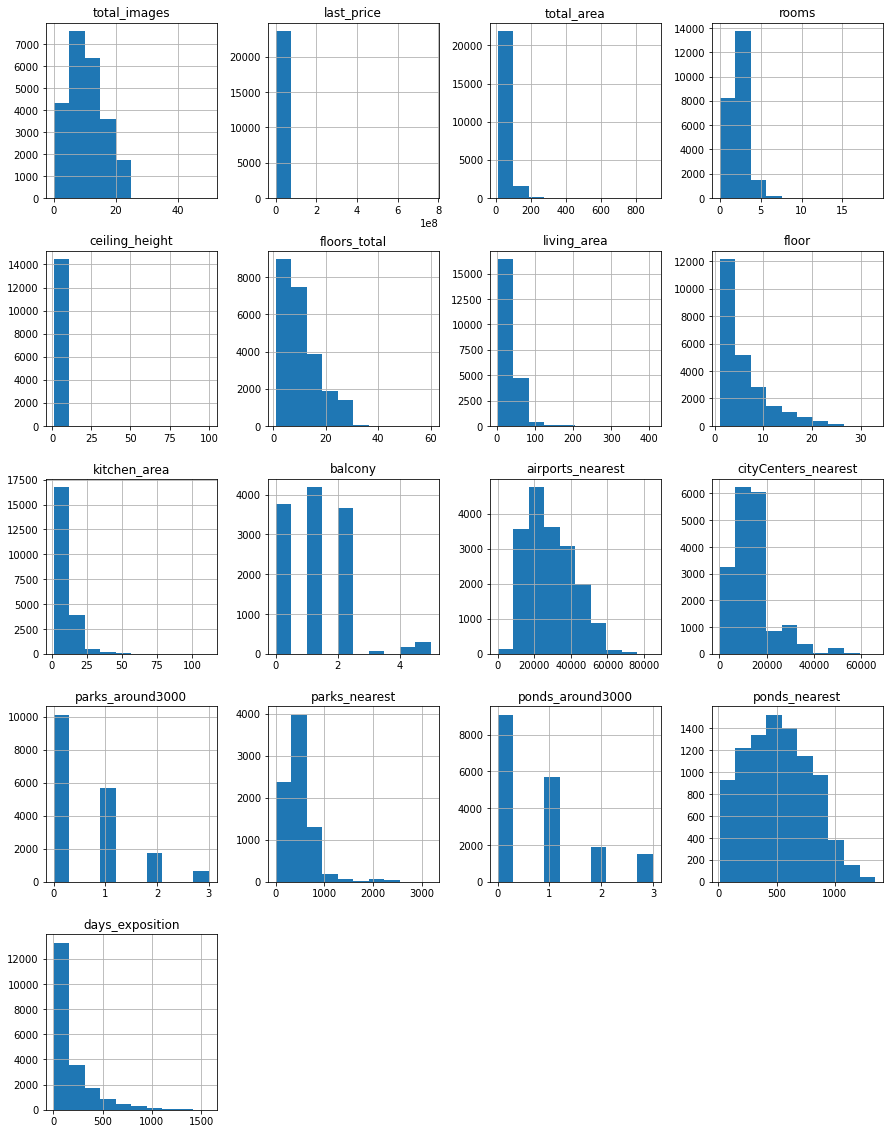

In [7]:
# общая гистограмма для всех столбцов
data.hist(figsize=(15, 20))

***Сложно делать какие то выводы по такой гистограмме, поэтому рассмотрим каждый параметр поближе***

### Предобработка данных

#### Переименование столбцов

In [8]:
# переименовываем столбцы
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest',
                            'parks_around3000':'parks_around_3000',
                            'ponds_around3000':'ponds_around_3000'})

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Проверка на аномалии по общей площади

In [11]:
strange_areas = data.query('total_area*0.9 <= (living_area + kitchen_area)').count()
print(strange_areas)
    

total_images            475
last_price              475
total_area              475
first_day_exposition    475
rooms                   475
ceiling_height          306
floors_total            474
living_area             475
floor                   475
is_apartment             63
studio                  475
open_plan               475
kitchen_area            475
balcony                 209
locality_name           475
airports_nearest        345
city_centers_nearest    345
parks_around_3000       345
parks_nearest           175
ponds_around_3000       345
ponds_nearest           183
days_exposition         396
dtype: int64


#### Проверка высоты потолков в Санкт-Петербурге и других городах(медианное значение)

In [12]:
median_spb_ceiling = data.loc[data['locality_name'] == 'Санкт-Петербург', 'ceiling_height'].median()
median_other_ceiling = data.loc[data['locality_name'] != 'Санкт-Петербург', 'ceiling_height'].median()
display('Высота потолков Санкт-Петербурга:', median_spb_ceiling)
display('Высота потолков других поселений:', median_other_ceiling)

'Высота потолков Санкт-Петербурга:'

2.7

'Высота потолков других поселений:'

2.6

**Таким образом видим, что данные отличаются не на много, поэтому пропуски в этом столбце можно заполнить медианным значением, это не исказит сильно картину.**

#### Заполнение пропусков

In [13]:
# Заполняем пропуски
for column in data.columns:
    if column in ['living_area', 'kitchen_area', 'is_apartment', 
                  'balcony', 'airports_nearest', 'parks_around_3000', 
                  'parks_nearest', 'ponds_around_3000', 'ponds_nearest', 'days_exposition']:
        #data[column] = data[column].fillna(value=data[column].median())
        data[column] = data[column].fillna(value=0)
    elif column in ['floors_total', 'locality_name']:
        data.dropna(subset=[column], inplace=True)
    elif column in ['ceiling_height']:
        data[column] = data[column].fillna(value=data[column].median())
        

In [14]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18064.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,31.727971,5.878124,9.565173,0.593677,22046.601697,14192.656056,0.468831,167.169998,0.589900,198.738129,156.420115
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,23.109611,4.871485,6.407798,0.960660,16462.135803,8613.348153,0.748403,306.301628,0.883966,305.195521,213.517293
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,17.800000,2.000000,6.300000,0.000000,10143.000000,9238.000000,0.000000,0.000000,0.000000,0.000000,22.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,29.000000,4.000000,9.000000,0.000000,21854.000000,13096.500000,0.000000,0.000000,0.000000,0.000000,73.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,41.100000,8.000000,11.410000,1.000000,34324.000000,16285.000000,1.000000,301.000000,1.000000,389.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [15]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest    5501
parks_around_3000          0
parks_nearest              0
ponds_around_3000          0
ponds_nearest              0
days_exposition            0
dtype: int64

In [16]:
#Проводим проверку второй раз, что посмотреть появились ли новые аномальные значения
strange_areas = data.query('total_area*0.9 <= (living_area + kitchen_area)').count()
print(strange_areas)

total_images            489
last_price              489
total_area              489
first_day_exposition    489
rooms                   489
ceiling_height          489
floors_total            489
living_area             489
floor                   489
is_apartment            489
studio                  489
open_plan               489
kitchen_area            489
balcony                 489
locality_name           489
airports_nearest        489
city_centers_nearest    356
parks_around_3000       489
parks_nearest           489
ponds_around_3000       489
ponds_nearest           489
days_exposition         489
dtype: int64


**Количество строк с аномальными значениями увеличилось не на много. В то время как при заполнении пропущенных строк медианным значением их становится >1400. Кстати, при попытке сделать срез базы данных по условию (data = data.query(total_area*0.9 > (living_area + kitchen_area)), теряется большой процент данных. Поэтому было принято решение заполнить пропуски нулями, так как процент искажения ниже.**

In [17]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18064.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,31.727971,5.878124,9.565173,0.593677,22046.601697,14192.656056,0.468831,167.169998,0.589900,198.738129,156.420115
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,23.109611,4.871485,6.407798,0.960660,16462.135803,8613.348153,0.748403,306.301628,0.883966,305.195521,213.517293
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,17.800000,2.000000,6.300000,0.000000,10143.000000,9238.000000,0.000000,0.000000,0.000000,0.000000,22.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,29.000000,4.000000,9.000000,0.000000,21854.000000,13096.500000,0.000000,0.000000,0.000000,0.000000,73.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,41.100000,8.000000,11.410000,1.000000,34324.000000,16285.000000,1.000000,301.000000,1.000000,389.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Меняем тип данных на верный

In [18]:
# функция к приведению к нужным типам
for column in data.columns:
    if column in ['floors_total', 'balcony', 'airports_nearest', 'parks_around_3000', 
                  'park_nearest', 'ponds_around_3000', 'ponds_nearest', 'days_exposition']:
        data[column] = data[column].astype('int') # в int
    elif column in ['is_apartment']: data[column] = data[column].astype('bool') # в bool
    elif column in ['first_day_exposition']: 
        data[column] = pd.to_datetime(data[column], format='%Y-%m-%dT%H:%M:%S') # datetime

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

#### Проверка на аномальные значения и дубликаты

**Далее производим проверку на аномальные значения и дубликаты:**

In [20]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

**В столбце _'ceiling_height'_ были онаружены аномальные значения**

In [21]:
# Фукция избавления от аномальных значений 
def ceiling_height_func(ceiling_height):
    if 11 <= ceiling_height:
        return ceiling_height / 10
    else:
        return ceiling_height
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_height_func)
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

In [22]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

**В столбце _'locality_name'_ были обнаружены неявные дубликаты, чтобы избавиться от них используем методы:**

- **.str.lower()**
- **.str.replace()**

In [23]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')

In [24]:
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары',
       'поселок городского типа янино-1', 'поселок парголово',
       'поселок мурино', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'посел

In [25]:
# check
data.locality_name.nunique()

323

In [26]:
# проводим проверку на дубликаты
data.duplicated().sum()

0

#### Проверка пропусков в столбце 'city_centers_nearest' в Санкт-Петербурге и других городах

In [27]:
display(data.loc[data['locality_name'] == 'санкт-петербург', 'city_centers_nearest'].isna().sum())
display(data.loc[data['locality_name'] != 'санкт-петербург', 'city_centers_nearest'].isna().sum())

60

5441

**Количество пропусков в других населенных пунктах составляет 5441 значений в отличие от пропусков в городе Санкт-Петербург. Это значит что заменяя медианным значением, значения будут заполнены медианным значение по городу Санкт-Петербург. Лучше заполнить такие пропуски 0.**

In [28]:
# заполняем пропуски в столбце 'city_centers_nearest' 0.
#data['city_centers_nearest'].fillna(data.groupby('locality_name')['city_centers_nearest'].mean(),inplace=True)
#data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data['city_centers_nearest'].mean())
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(value=0)

In [29]:
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around_3000       0
parks_nearest           0
ponds_around_3000       0
ponds_nearest           0
days_exposition         0
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

####  Вывод по пункту предобработка данных

В ходе этапа предоработки данных были выявлены ошибки в типах данных, пропуски, неявные дубликаты, ошибки в названиях.
Типы данных были переведены в верные. Пропуски были заполнены с помощью медианного значения, среднего и нулей, где замену было невозможно определить. Строки в столбцах  __locality_name__ и __floors_total__, где были пропущены значения были удалены.
Дубликаты были обнаружены в столбце __locality_name__, что связано в первую очередь с тем, что значения пользователь вбивает вручную, поэтому есть дубликаты в названиях (городской поселок/поселок городского типа). Аномальные значения были обнаружены в столбце __ceiling_height__, что связано с пропуском запятой. Пропуски в таких столбцах как (__is_apartment, kitchen_area, balcony__) связано с тем, что пользователи не стали отвечать на данные пункты, что связано с тем, что квартира не является студией/является студией поэтому нет отдельной площади кухни/ не имеет балкона. Пропуски в столбцах, перечисленных ниже связаны с картографическим сбором данных и тем, что в радиусе 3 км аэропорты, парки, пруды отсутствуют:
- __airports_nearest__             
- __city_centers_nearest__         
- __parks_around_3000__             
- __parks_nearest__               
- __ponds_nearest__                  
- __days_exposition__

In [31]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [32]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median', 'mean'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00"
min,0.00,12.00,1.00,0.00,"12,190.00",0.00,0.00,1.00,1.00
max,19.00,900.00,10.30,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00
median,2.00,52.00,2.65,73.00,"4,646,000.00",29.00,9.00,4.00,9.00
mean,2.07,60.32,2.70,156.42,"6,540,058.26",31.73,9.57,5.88,10.68


In [33]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [34]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


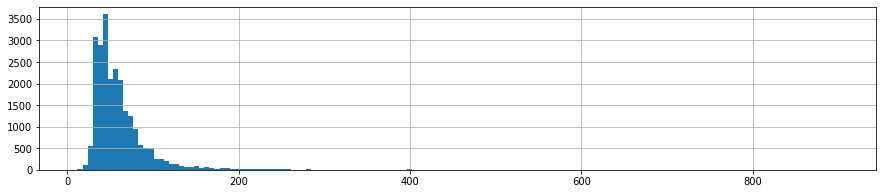

In [35]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

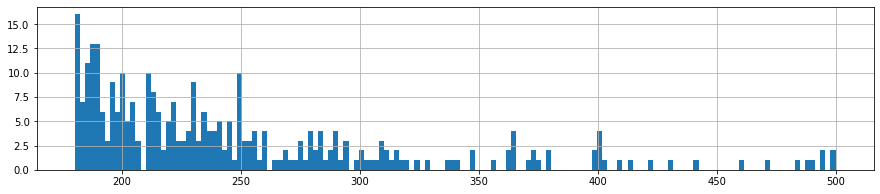

In [36]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

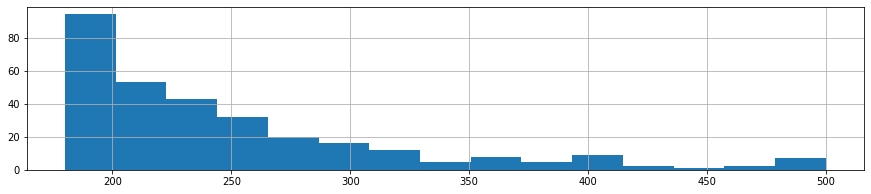

In [37]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

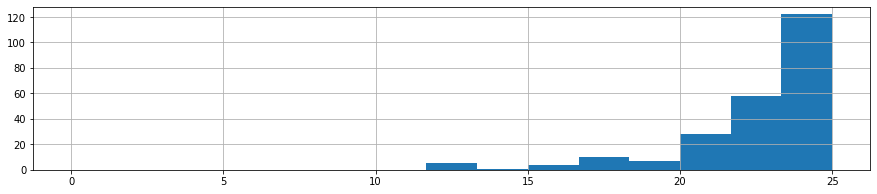

In [38]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

## Добавляем новые столбцы

### Столбец price_for_m2

In [40]:
# Добавляем столбец с ценой за 1м2 
data['price_for_m2'] =  data['last_price'] / data['total_area'] 
locality_price_mean = data.groupby('locality_name')['price_for_m2'].mean()
data['price_for_m2'].fillna(locality_price_mean, inplace=True) # заполняем пропуски средним значением по городу
#data.dropna(subset=['price_for_m2'],inplace=True) # удаляем оставшиеся пропуски
data['price_for_m2'].isna().sum()

0

### Столбцы week_day, month, year

In [41]:
# Добавляем столбцы с днем недели, месяцем, годом
data['week_day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

### Столбец floor_type

In [42]:
# функция распределением типа этажа по его номеру
def floor_func(row):
    floor_number = row['floor']
    floors_total = row['floors_total']
    if floor_number == 1:
        return 'Первый этаж'
    elif floor_number == floors_total:
        return 'Последний этаж'
    elif floor_number <= 0:
        return 'Неверный номер этажа'
    else:
        return 'Другой этаж'
data['floor_type'] = data.apply(floor_func, axis=1)


### Столбец city_centre_km

In [43]:
# Функция перевода в километры расстояния до центра города
def city_centre_km(city_centers_nearest):
    if city_centers_nearest > 0:
        return round(city_centers_nearest / 1000)

data['city_centre_km'] = data['city_centers_nearest'].apply(city_centre_km) 



In [44]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_for_m2,week_day,month,year,floor_type,city_centre_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,санкт-петербург,18863,16028.0,1,482.0,2,755,0,120370.370370,3,3,2019,Другой этаж,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок шушары,12817,18603.0,0,0.0,0,0,81,82920.792079,1,12,2018,Первый этаж,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,санкт-петербург,21741,13933.0,1,90.0,2,574,558,92785.714286,3,8,2015,Другой этаж,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,0.00,9,False,False,False,0.00,0,санкт-петербург,28098,6800.0,2,84.0,3,234,424,408176.100629,4,7,2015,Другой этаж,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,санкт-петербург,31856,8098.0,2,112.0,1,48,121,100000.000000,1,6,2018,Другой этаж,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,поселок городского типа янино-1,0,0.0,0,0.0,0,0,55,95065.789474,0,9,2018,Другой этаж,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,поселок парголово,52996,19143.0,0,0.0,0,0,155,99195.710456,3,11,2017,Другой этаж,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,0.00,22,False,False,False,18.90,2,санкт-петербург,23982,11634.0,0,0.0,0,0,0,110544.692737,3,4,2019,Другой этаж,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,поселок мурино,0,0.0,0,0.0,0,0,189,87454.764777,2,5,2018,Другой этаж,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,санкт-петербург,50898,15008.0,0,0.0,0,0,289,88524.590164,6,2,2017,Другой этаж,15.0


## Исследовательский анализ данных

### Изучение каждого параметра по отдельности

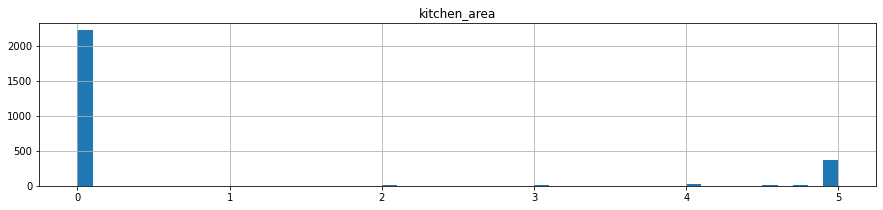

In [45]:
# check
data.hist(column = 'kitchen_area', bins = 50, figsize = (15,3), range = (0,5));

In [46]:
data = data.query('total_area <= 200 and rooms <= 8 and 5 <= kitchen_area <= 25 and 1000000 <= last_price <= 20000000')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20097 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20097 non-null  int64         
 1   last_price            20097 non-null  float64       
 2   total_area            20097 non-null  float64       
 3   first_day_exposition  20097 non-null  datetime64[ns]
 4   rooms                 20097 non-null  int64         
 5   ceiling_height        20097 non-null  float64       
 6   floors_total          20097 non-null  int64         
 7   living_area           20097 non-null  float64       
 8   floor                 20097 non-null  int64         
 9   is_apartment          20097 non-null  bool          
 10  studio                20097 non-null  bool          
 11  open_plan             20097 non-null  bool          
 12  kitchen_area          20097 non-null  float64       
 13  balcony         

**После фильтрации отпало 15% строк, что больше чем чем критичный уровень потерь в 10%. (100-(20097/23565*100)**

In [47]:
# check

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"20,097.00","20,097.00","20,097.00","20,097.00","20,097.00","20,097.00","20,097.00","20,097.00","20,097.00"
min,1.00,20.00,1.00,0.00,"1,000,000.00",0.00,5.00,1.00,1.00
max,8.00,200.00,10.00,"1,580.00","20,000,000.00",159.60,25.00,33.00,60.00


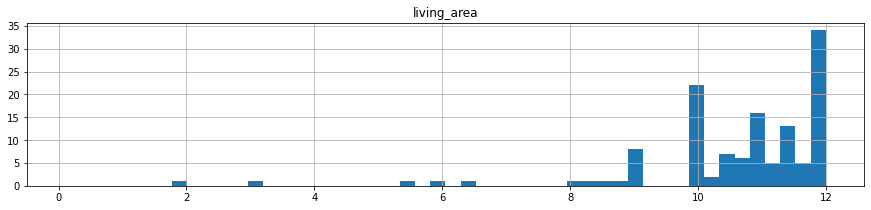

In [48]:
# check
data.hist(column = 'living_area', bins = 50, figsize = (15,3), range = (0.1,12));

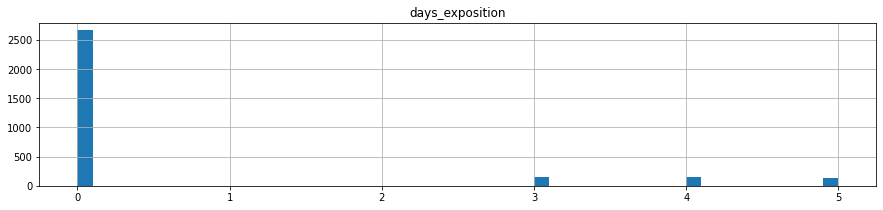

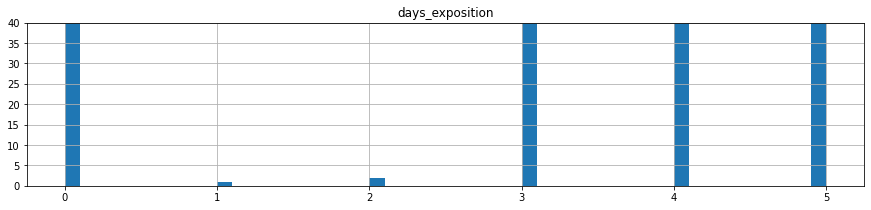

In [49]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

count    20097.000000
mean        56.488433
std         22.657357
min         20.000000
25%         40.000000
50%         51.000000
75%         67.000000
max        200.000000
Name: total_area, dtype: float64

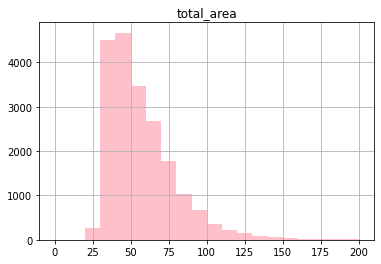

In [50]:
# гистограмма для анализа параметра общей площади
data.hist('total_area', color='pink', bins=20, range = (0, 200))
display(data['total_area'].describe())

**Общая площадь:**
- __среднее значение площади = 58 м2__
- __медианное значение площади = 52 м2__
- __минимальное значение площади = 12 м2 - скорее всего комната в коммунальной квартире__

__помещения площадью более 200 м2  будем считать выбросом, т.к. их кол-во не велико.__

__Большее количество недвижемости площадью ~45м2__

count    20097.000000
mean         2.023834
std          0.952588
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

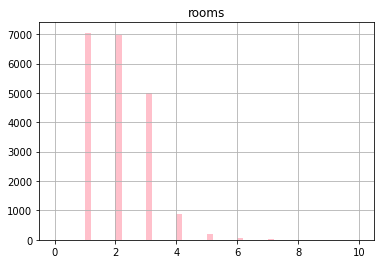

In [51]:
# гистограмма для анализа параметра количества комнат
data.hist('rooms', bins=50, color='pink', range = (0, 10))
display(data['rooms'].describe())

**Количество комнат:**
- __среднее число комнат = 2__
- __медианное число комнат = 2__
- __минимальное число комнат = 0 это студии__

__помещения количество комнат в которых более 8 будем считать выбросом__

count    20097.000000
mean         9.789646
std          3.594189
min          5.000000
25%          7.000000
50%          9.000000
75%         11.400000
max         25.000000
Name: kitchen_area, dtype: float64

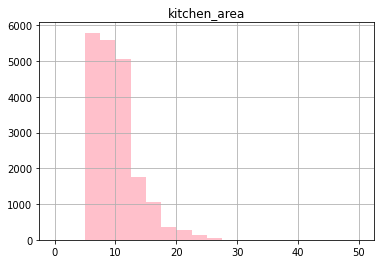

In [52]:
# гистограмма для анализа параметра площади кухни
data.hist('kitchen_area', bins=20, color='pink', range = (0, 50))
display(data['kitchen_area'].describe())

**Площадь кухни:**
- __среднее число = 10м2__
- __медианное число = 9м2__
- __минимальное число = 1,3м2__

__Кухни площадью меньше 5м2 и больше 25м2 можно считать выбросами__

count    2.009700e+04
mean     5.405107e+06
std      3.021442e+06
min      1.000000e+06
25%      3.499000e+06
50%      4.600000e+06
75%      6.490000e+06
max      2.000000e+07
Name: last_price, dtype: float64

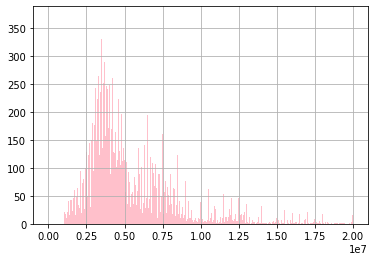

In [53]:
# гистограмма для анализа параметра стоимости
data['last_price'].hist(bins=500, color='pink', range=(0,20000000))
display(data['last_price'].describe())

**Стоимость недвижимости:**

- __средняя стоимость = 5,5 млн__
- __медианная стоимость = 4,6 млн__
- __минимальная стоимость = 12000__

__недвижимость дешевле 1 млн.  будем считать выбросом__

__недвижимость дороже 20 млн.  будем считать выбросом__

count    20097.000000
mean         2.685828
std          0.218647
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

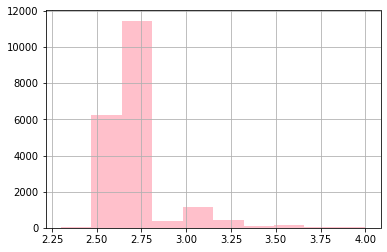

In [54]:
# гистограмма для анализа параметра высоты потолков
data['ceiling_height'].hist(bins=10, color='pink', range=(2.3,4))
display(data['ceiling_height'].describe())

**Высота потолков:**

- __средняя высота = 2.69 м__
- __медианная высота = 2.65 м__
- __минимальная высота = 1 м__

__помещения с высотой потолка менее 2,5 м будем считать выбросом.__

__помещения с высотой потолка более 5 м в рамках данного исследования будем считать выбросом__

<AxesSubplot:>

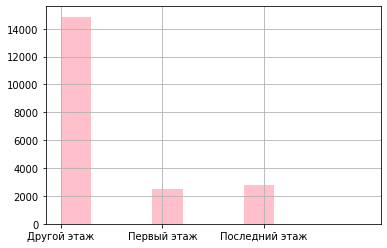

In [55]:
# гистограмма для анализа параметра типа этажа
data['floor_type'].hist(bins=10, color='pink', range=(0, 3))

**Меньше всего объявлений о продаже объектов недвижимости на 1 этаже.**

AxesSubplot(0.125,0.125;0.775x0.755)


count    20097.000000
mean         5.879186
std          4.846605
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

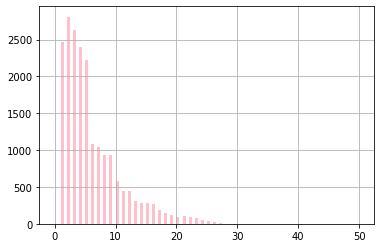

In [56]:
# гистограмма для анализа параметра номера этажа
print(data['floor'].hist(bins=100, color='pink', range=(0, 50)))
data['floor'].describe()

- __Больше всего объектов недвижимости продается на 2 этаже.__
- __среднее число = 6__
- __медианное число = 4__
- __минимальное число = 1__

AxesSubplot(0.125,0.125;0.775x0.755)


count    20097.000000
mean        10.723989
std          6.555290
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

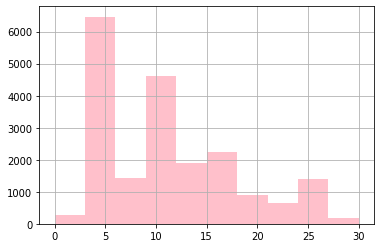

In [57]:
# гистограмма для анализа параметра этажности дома
print(data['floors_total'].hist(bins=10, color='pink', range=(0, 30)))
data['floors_total'].describe()

**Больше всего квартир продается в пятиэтажных и девятиэтажных домах.** 

AxesSubplot(0.125,0.125;0.775x0.755)


count    20097.000000
mean     11277.072797
std       9706.388914
min          0.000000
25%       3088.000000
50%      11690.000000
75%      15470.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

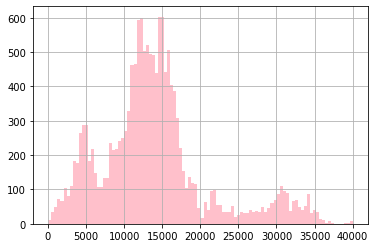

In [58]:
# гистограмма для анализа параметра удаленности от центра
print(data['city_centers_nearest'].hist(bins=100, color='pink', range=(50, 40000)))
data['city_centers_nearest'].describe()

**На графике можно наблюдать пиковое значение около 5км, это означет видимо данные по самому Санкт-Петербургу, потом падение и больше всего значений в выборке по другим городам.**

AxesSubplot(0.125,0.125;0.775x0.755)


count    20097.0
mean     22311.0
std      16522.0
min          0.0
25%      10663.0
50%      21793.0
75%      34967.0
max      84869.0
Name: airports_nearest, dtype: float64

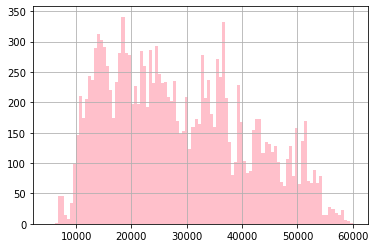

In [59]:
# гистограмма для анализа параметра удаленности от аэропорта
print(data['airports_nearest'].hist(bins=100, color='pink', range=(5000, 60000)))
round(data['airports_nearest'].describe())

**Среднее расстояние до аэропорта 22047м**

**Медианное значение 21854м**

AxesSubplot(0.125,0.125;0.775x0.755)


count    20097.000000
mean       164.215604
std        301.829877
min          0.000000
25%          0.000000
50%          0.000000
75%        293.000000
max       3190.000000
Name: parks_nearest, dtype: float64

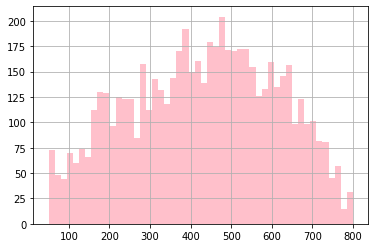

In [60]:
# гистограмма для анализа параметра удаленности от ближайшего парка
print(data['parks_nearest'].hist(bins=50, color='pink', range=(50, 800)))
data['parks_nearest'].describe()

**Среднее количество парков 167**

**Медианное значение - 0**

AxesSubplot(0.125,0.125;0.775x0.755)


count    20097.000000
mean         2.548838
std          1.782153
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          6.000000
Name: week_day, dtype: float64

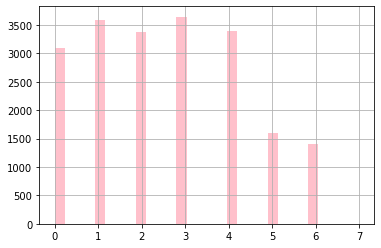

In [61]:
# гистограмма для анализа параметра дня недели
print(data['week_day'].hist(bins=30, color='pink', range=(0, 7)))
data['week_day'].describe()

**Судя по гистрограмме, объявлений выставленных в воскресенье нет вовсе, меньше всего объявлений в пятницу и субботу.**

AxesSubplot(0.125,0.125;0.775x0.755)


count    20097.000000
mean         6.427178
std          3.464343
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

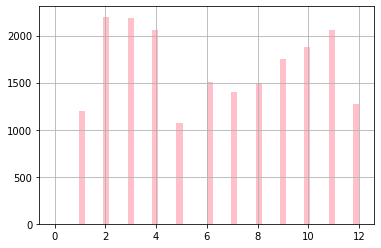

In [62]:
# гистограмма для анализа параметра месяца
print(data['month'].hist(bins=50, color='pink', range=(0, 12)))
data['month'].describe()

**Судя по гистограмме, меньше всего объявлений о продаже недвижимости в мае и январе. Февраль как самый короткий месяц опережает все остальные.**

### Анализ скорости продажи


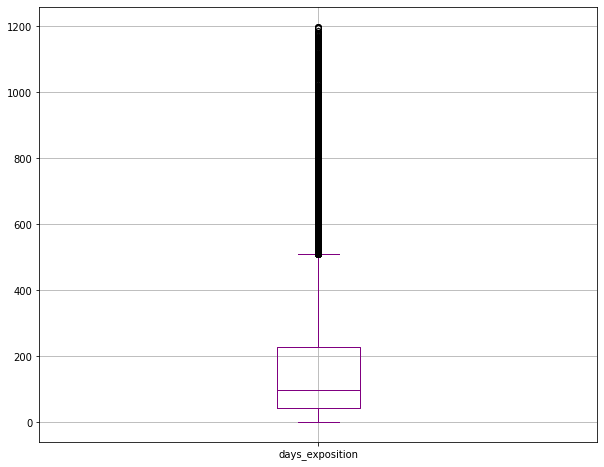

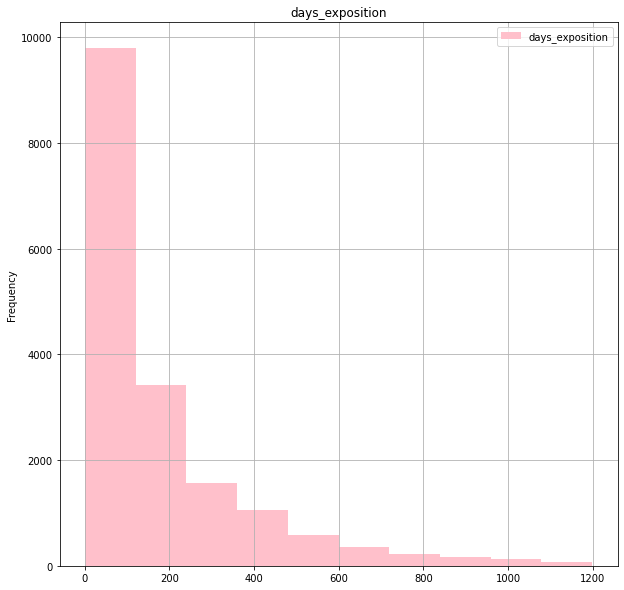

count    17362.000000
mean       176.739546
std        205.495151
min          1.000000
25%         44.000000
50%         98.000000
75%        230.000000
max       1199.000000
Name: days_exposition, dtype: float64


In [63]:
# анализ даты размещения объявления
days_exposition_data = data.query('0 < days_exposition < 1200')
days_exposition_data.boxplot(column='days_exposition', color='purple', figsize=(10,8))
plt.show()

days_exposition_data.plot(kind='hist',
          y='days_exposition',
          grid=True,
          title='days_exposition',
          figsize=(10, 10),
          color='pink',)
plt.show()
print(days_exposition_data['days_exposition'].describe())

- __среднее время продажи недвижимости - 155 дней__
- __медианное время продажи недвижимости - 91 дня__
- __нормальной длительностью продажи можно считать от 44 до 211 дней__


__days_exposition = 0 можно не рассматривать, т.к. данная недвижимость еще не продана__

### анализ влияния факторов общей площади, жилой площади, площади кухни, количества комнат на цену

<AxesSubplot:>

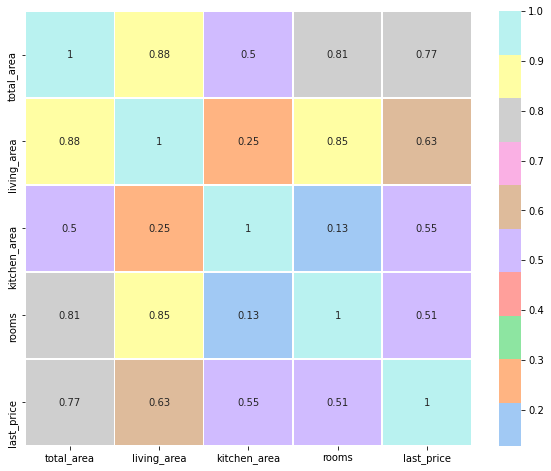

In [64]:
# анализ влияния факторов общей площади, жилой площади, площади кухни, количества комнат на цену
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data=data[['total_area', 'living_area', 'kitchen_area', 'rooms', 'last_price']].corr(),
            annot=True,
            cmap= sns.color_palette('pastel'),
            linewidths=0.5)

In [65]:
data_area = data.query('total_area <= 150 and price_for_m2 < 1000000')

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

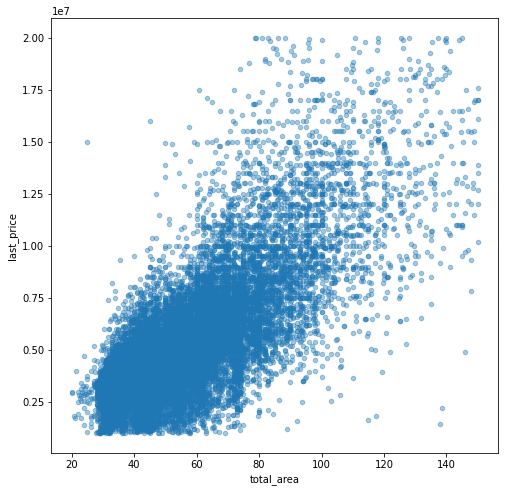

In [66]:
data_area.plot(x='total_area', y='last_price', kind='scatter', alpha=0.4, figsize=(8, 8)) 

***Опять же видна зависимость между площадью и стоимостью***


<AxesSubplot:xlabel='living_area', ylabel='last_price'>

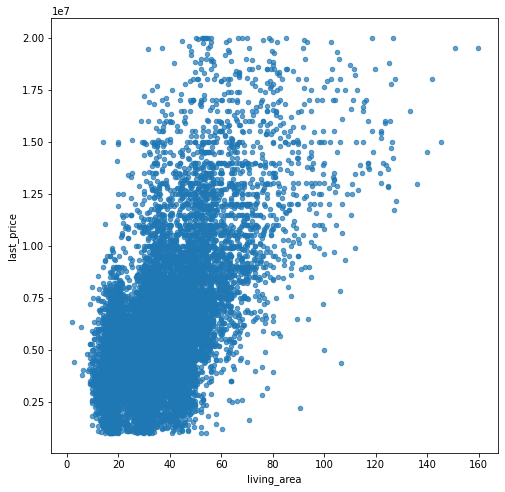

In [67]:
data_living_area = data.query('0 < living_area < 200 and price_for_m2 < 1000000')
data_living_area.plot(x='living_area', 
                      y='last_price', 
                      kind='scatter', 
                      alpha=0.7, 
                      figsize=(8, 8))

***Зависимость между жилой площадью и стоимостью так же видна***

In [68]:
data_kitchen_area = data.query('0 < kitchen_area < 80 and price_for_m2 < 1000000')

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

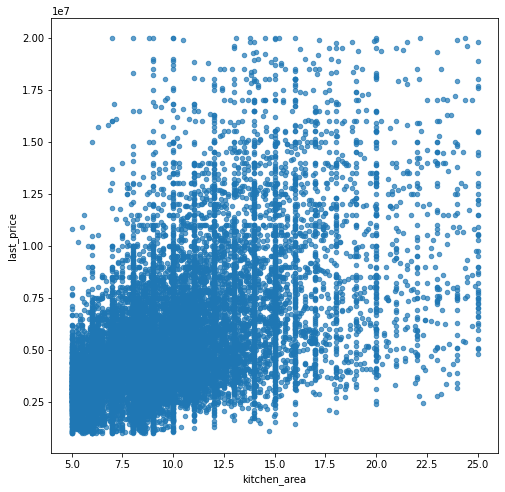

In [69]:
data_kitchen_area.plot(x='kitchen_area', 
                       y='last_price', 
                       kind='scatter', 
                       alpha=0.7, 
                       figsize=(8, 8))

**По результатам графика мы можем наблюдать сильную положительную связь стоимости недвижимости с такими факторам как общая площадь, жилая площадь. Так же наблюдается слабая положительная связь между площадью кухни, количеством комнат и стоимостью недвижимости.
Так же отдельно стоит отметить наличие сильной положительной связи мнежду такими параметрами как общая площадь с жилой площадью, количеством комнат и площадью кухни.**

<AxesSubplot:xlabel='floor_type', ylabel='mean'>

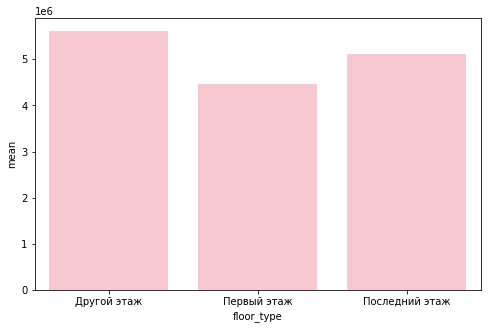

In [70]:
# Анализ влияния типа этажа на стоимость
floor_price_pivot = data.pivot_table(index='floor_type', 
                                     values='last_price', 
                                     aggfunc=['sum','mean'])
floor_price_pivot.columns = ['sum_last_price', 'mean']
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=floor_price_pivot.index,
            y=floor_price_pivot['mean'],
            ax=ax,
           color='pink')

**Стоит отметить, что средняя стоимость недвижимости на последнем этаже гораздно выше средней стоимости недвижимости на первом и других этажах.**

### Анали влияния даты на стоимость недвижимости

<AxesSubplot:xlabel='week_day', ylabel='mean'>

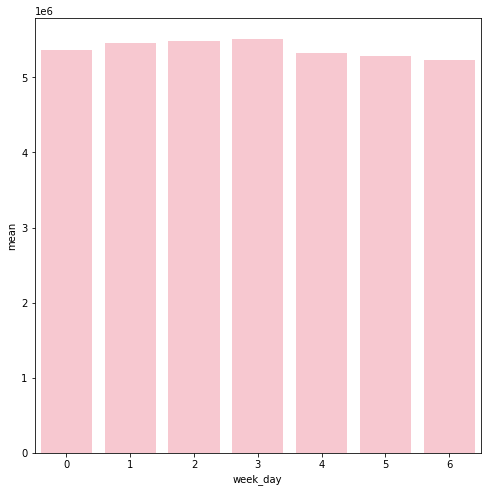

In [71]:
# Анализ влияния дня недели на стоимость объекта недвижимости
weekday_price_pivot = data.pivot_table(index='week_day', 
                                     values='last_price', 
                                     aggfunc=['sum','mean'])
weekday_price_pivot.columns = ['sum_last_price', 'mean']
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=weekday_price_pivot.index,
            y=weekday_price_pivot['mean'],
            ax=ax,
           color='pink')

**Связи средней стоимости недвижимости с днем недели нет.**

<AxesSubplot:xlabel='month', ylabel='mean'>

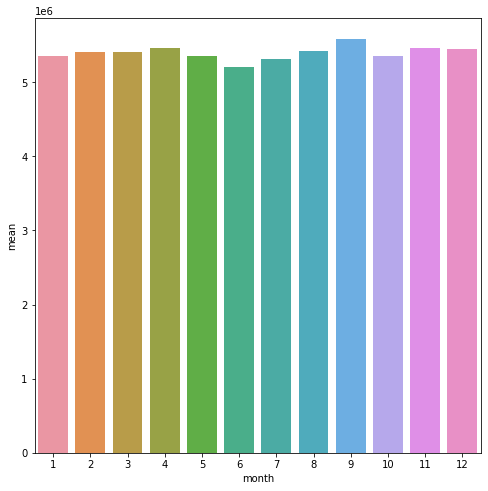

In [72]:
# Анализ влияния месяца на стоимость объекта недвижимости
month_price_pivot = data.pivot_table(index='month', 
                                     values='last_price', 
                                     aggfunc=['sum','mean'])
month_price_pivot.columns = ['sum_last_price', 'mean']
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=month_price_pivot.index,
            y=month_price_pivot['mean'],
            ax=ax,
           )

**Связи средней стоимости недвижимости с месяцем нет.**

<AxesSubplot:xlabel='year', ylabel='mean'>

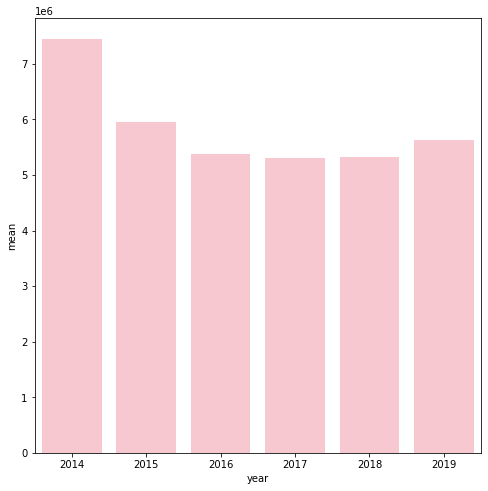

In [73]:
# Анализ влияния года на стоимость объекта недвижимости
year_price_pivot = data.pivot_table(index='year', 
                                     values='last_price', 
                                     aggfunc=['sum','mean'])
year_price_pivot.columns = ['sum_last_price', 'mean']
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=year_price_pivot.index,
            y=year_price_pivot['mean'],
            ax=ax,
            color='pink'
           )

<AxesSubplot:xlabel='year', ylabel='mean'>

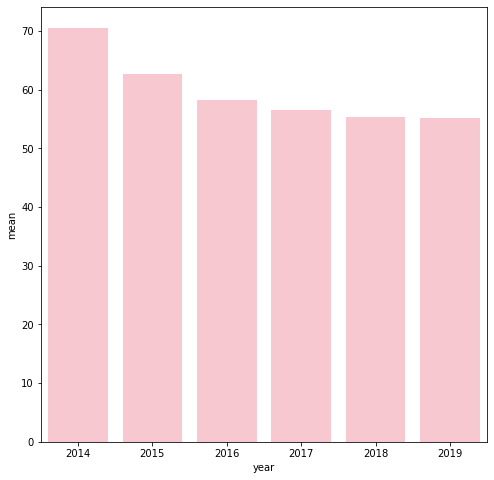

In [74]:
# График изменения площади с годом
year_area_pivot = data.pivot_table(index='year', 
                                   values='total_area', 
                                   aggfunc=['sum', 'mean'])
year_area_pivot.columns = ['sum', 'mean']
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=year_area_pivot.index,
            y=year_area_pivot['mean'],
            ax=ax,
            color='pink'
           )

***Средняя площадь снижала с каждым годом***

<AxesSubplot:xlabel='year', ylabel='count'>

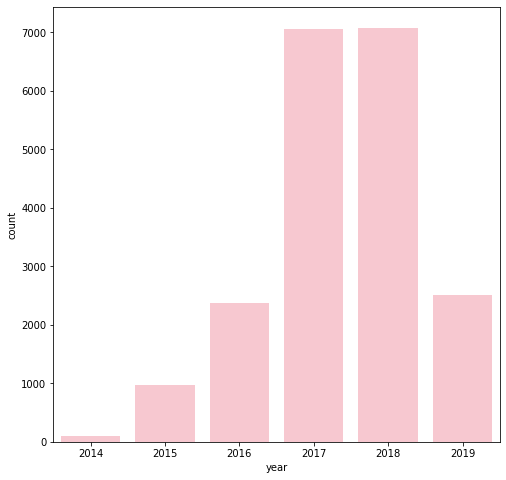

In [75]:
# Влияние года на количество объявлений
year_area_count_pivot = data.pivot_table(index='year', 
                                         values='total_area', 
                                         aggfunc=['count'])
year_area_count_pivot.columns = ['count']
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=year_area_count_pivot.index,
            y=year_area_count_pivot['count'],
            ax=ax,
            color='pink'
           )

**Больше всего объявлений было в 2016 и 2017 годах.**

### Расчет средней стоимости за 1м2 в топ-10 городах по количеству объявлений

,mean_price,mean
locality_name,,
санкт-петербург,13365,107877.0
пушкин,317,101611.0
деревня кудрово,228,92395.0
поселок парголово,289,90691.0
поселок мурино,444,85080.0
поселок шушары,394,78456.0
колпино,320,75195.0
гатчина,285,68803.0
всеволожск,352,67254.0


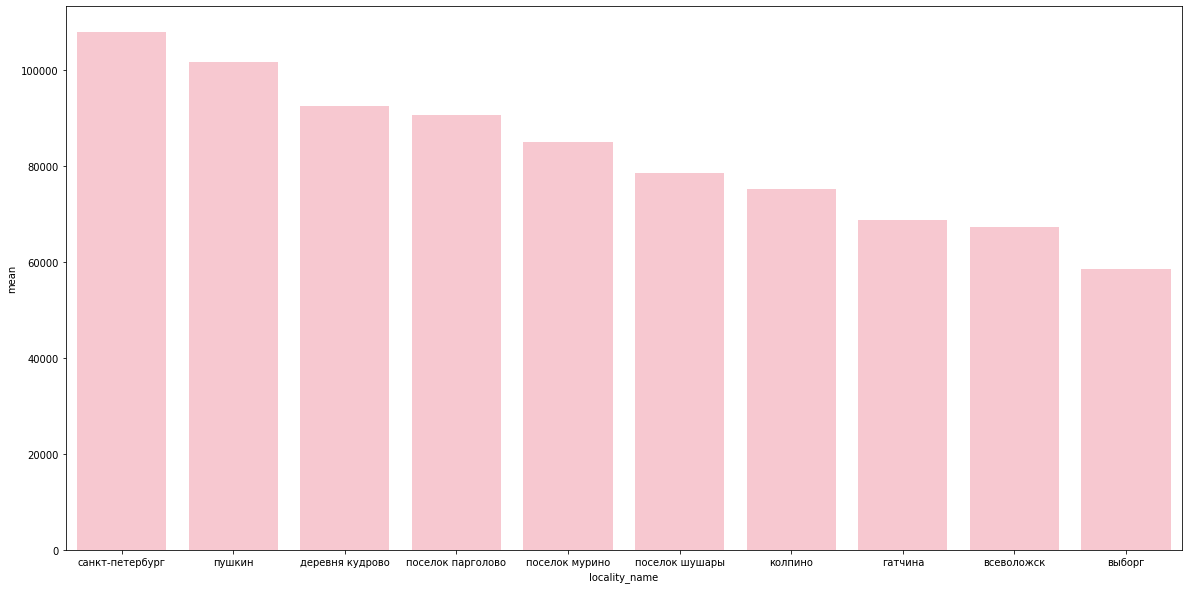

In [76]:
# Расчет средней стоимости за 1м2 в топ-10 городах по количетсву объявлений
locality_price_for_m2 = data.pivot_table(index='locality_name', values='price_for_m2', aggfunc=['count','mean'])
locality_price_for_m2.columns = ['count_adds', 'mean_price']
sorted_by_adds = locality_price_for_m2.sort_values(by='count_adds', ascending=False).head(10)
top_10 = round(sorted_by_adds.sort_values(by='mean_price', ascending=False).head(10))
top_10.columns = ['mean_price', 'mean']
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=top_10.index,
            y=top_10['mean'],
            ax=ax,
            color='pink'
           )
display(top_10)

**Самый дорогой средний 1м2 в Санкт-Петербурге, Пушкине, деревне Кудрово.**

**Низкая средняя стоимость 1м2 отмечается в Гатчине, Всеволжске, Выборге.**



### Анализ влияния удаленности от центра на 1м2 в городе Санкт-Петербург

Text(0, 0.5, 'Стоимость 1м2')

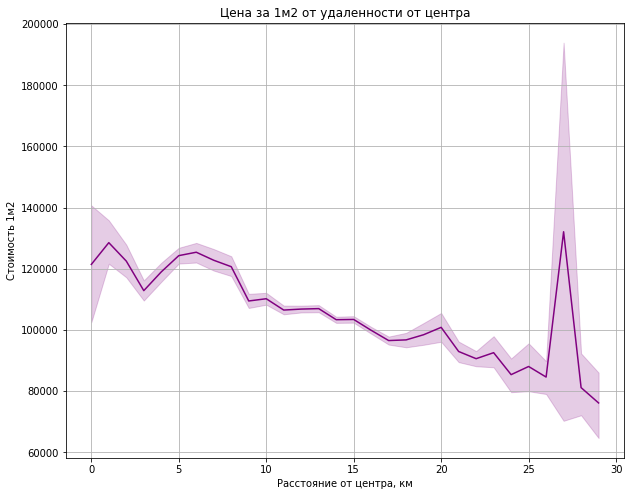

In [77]:
# Анализ влияния удаленности от центра на 1м2 в городе Санкт-Петербург
fig, ax = plt.subplots(figsize=(10,8))
spb_price_centre = data.query('locality_name == "санкт-петербург" and total_area <= 250')
sns.lineplot(data=spb_price_centre,
             x='city_centre_km',
             y='price_for_m2',
             color='purple')
plt.grid()
plt.title('Цена за 1м2 от удаленности от центра')
plt.xlabel('Расстояние от центра, км')
plt.ylabel('Стоимость 1м2')

**Как видно из графика, при удаленности от центра цена за 1м2 начинает падать.**

In [78]:
data_city_centre_1 = spb_price_centre.query('3 <= city_centre_km <= 5 and total_area <= 250')
data_city_centre_1.sort_values(by='price_for_m2', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_for_m2,week_day,month,year,floor_type,city_centre_km
4713,11,16000000.0,45.00,2018-07-14,2,2.65,8,29.0,4,False,False,False,7.00,0,санкт-петербург,25476,4324.0,1,634.0,3,458,102,355555.555556,5,7,2018,Другой этаж,4.0
3730,16,17500000.0,60.60,2017-11-09,2,2.95,8,33.1,3,False,False,False,12.40,0,санкт-петербург,24651,5331.0,2,529.0,0,0,12,288778.877888,3,11,2017,Другой этаж,5.0
16800,12,15700000.0,57.70,2017-09-28,2,3.00,20,37.3,5,False,False,False,6.30,2,санкт-петербург,27641,4598.0,1,646.0,1,368,255,272097.053726,3,9,2017,Другой этаж,5.0
13797,12,14400000.0,53.00,2016-03-30,2,3.20,5,32.4,4,False,False,False,8.00,0,санкт-петербург,24281,3848.0,1,941.0,3,248,886,271698.113208,2,3,2016,Другой этаж,4.0
19803,14,13300000.0,50.00,2017-11-10,2,2.65,7,25.0,1,False,False,False,8.50,0,санкт-петербург,25530,4378.0,1,366.0,2,289,89,266000.000000,4,11,2017,Первый этаж,4.0
19780,11,9300000.0,35.40,2017-05-10,1,2.65,5,18.8,3,False,False,False,7.60,0,санкт-петербург,24392,4487.0,3,492.0,0,0,258,262711.864407,2,5,2017,Другой этаж,4.0
975,19,19999000.0,78.60,2018-09-19,3,2.96,6,50.2,4,False,False,False,10.00,0,санкт-петербург,21679,3468.0,1,592.0,0,0,180,254440.203562,2,9,2018,Другой этаж,3.0
13659,20,9500000.0,40.00,2017-11-04,1,3.00,6,17.0,3,False,False,False,10.00,0,санкт-петербург,24462,5030.0,1,540.0,1,784,394,237500.000000,5,11,2017,Другой этаж,5.0
5988,3,19837000.0,83.60,2018-06-23,2,2.65,11,44.7,6,False,False,False,19.90,0,санкт-петербург,30917,3896.0,2,456.0,3,91,90,237284.688995,5,6,2018,Другой этаж,4.0
16919,19,7400000.0,31.50,2015-12-02,1,2.85,7,21.5,6,False,False,False,6.00,1,санкт-петербург,24324,5038.0,0,0.0,0,0,307,234920.634921,2,12,2015,Другой этаж,5.0


***Судя по всему пиковые значения 3-5 км от центра приходятся на квартиры с большой площадью.***

In [79]:
data_city_centre_2 = spb_price_centre.query('25 <= city_centre_km <= 30')
data_city_centre_2.sort_values(by='price_for_m2', ascending=False).head(20)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_for_m2,week_day,month,year,floor_type,city_centre_km
748,13,14350000.0,74.00,2017-11-28,2,3.13,5,30.0,3,False,False,False,25.0,0,санкт-петербург,23888,27313.0,1,1496.0,0,0,128,193918.918919,1,11,2017,Другой этаж,27.0
14316,8,4300000.0,37.20,2019-04-03,1,2.64,5,15.0,3,False,False,False,13.0,0,санкт-петербург,47156,25503.0,1,306.0,1,1255,6,115591.397849,2,4,2019,Другой этаж,26.0
14146,18,4150000.0,36.00,2018-09-05,1,2.50,10,20.0,7,False,False,False,7.0,1,санкт-петербург,22603,26027.0,0,0.0,0,0,45,115277.777778,2,9,2018,Другой этаж,26.0
8243,6,4070000.0,36.30,2018-09-26,1,2.65,25,17.1,7,False,False,False,10.4,2,санкт-петербург,23776,25406.0,0,0.0,1,471,37,112121.212121,2,9,2018,Другой этаж,25.0
16607,6,4680000.0,43.00,2018-10-29,1,2.50,5,18.0,5,False,False,False,14.0,0,санкт-петербург,47589,25200.0,1,453.0,0,0,68,108837.209302,0,10,2018,Последний этаж,25.0
1111,0,4072000.0,38.00,2015-10-14,1,2.65,5,16.0,4,False,False,False,12.0,1,санкт-петербург,46919,28018.0,0,0.0,0,0,285,107157.894737,2,10,2015,Другой этаж,28.0
3206,20,3420000.0,32.00,2018-09-08,1,2.70,25,16.7,23,False,False,False,8.1,0,санкт-петербург,23776,25406.0,0,0.0,1,471,44,106875.000000,5,9,2018,Другой этаж,25.0
4907,2,5250000.0,50.60,2018-08-14,2,2.65,25,0.0,3,False,False,False,10.0,0,санкт-петербург,23768,25480.0,0,0.0,1,545,60,103754.940711,1,8,2018,Другой этаж,25.0
16940,3,5250000.0,50.60,2018-08-27,2,2.65,25,0.0,3,False,False,False,10.0,0,санкт-петербург,23654,25366.0,0,0.0,1,607,60,103754.940711,0,8,2018,Другой этаж,25.0
16837,3,4370000.0,42.80,2018-09-20,1,2.65,25,17.0,17,False,False,False,12.1,0,санкт-петербург,23654,25366.0,0,0.0,1,607,81,102102.803738,3,9,2018,Другой этаж,25.0


***Скорее всего эти значения относятся к новостройкам, которые относятся к городу Санкт-Петербург, но расположены далеко от центра города. Возможно так это комфорт и бизнес класс дома***

In [80]:
spb_price_centre.query('city_centre_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_for_m2,week_day,month,year,floor_type,city_centre_km
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,False,False,25.0,0,санкт-петербург,23888,27313.0,1,1496.0,0,0,128,193918.918919,1,11,2017,Другой этаж,27.0
5961,6,2250000.0,32.0,2018-02-27,1,2.65,2,16.5,2,False,False,False,7.0,0,санкт-петербург,24006,27431.0,0,0.0,0,0,178,70312.500000,1,2,2018,Последний этаж,27.0


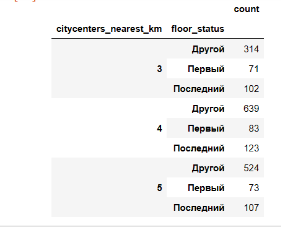

In [81]:
check_one = spb_price_centre.query('city_centre_km == 3')
third_km = check_one.pivot_table(index='floor_type', values='city_centre_km', aggfunc=['count'])
third_km.columns = ['floor_type']
display(third_km)


,floor_type
floor_type,
Другой этаж,168
Первый этаж,47
Последний этаж,67


In [82]:
check_one.sort_values(by='price_for_m2', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_for_m2,week_day,month,year,floor_type,city_centre_km
975,19,19999000.0,78.6,2018-09-19,3,2.96,6,50.2,4,False,False,False,10.0,0,санкт-петербург,21679,3468.0,1,592.0,0,0,180,254440.203562,2,9,2018,Другой этаж,3.0
17066,19,16800000.0,78.8,2018-10-10,2,2.90,9,38.8,3,False,False,False,18.0,0,санкт-петербург,20031,3232.0,1,613.0,1,200,0,213197.969543,2,10,2018,Другой этаж,3.0
11867,4,12000000.0,60.7,2017-02-19,2,3.55,7,29.1,4,False,False,False,16.7,0,санкт-петербург,22526,3175.0,1,1028.0,1,399,0,197693.574959,6,2,2017,Другой этаж,3.0
8720,19,12300000.0,62.3,2018-11-14,1,2.96,6,25.0,5,False,False,False,18.0,0,санкт-петербург,24750,3080.0,2,552.0,0,0,0,197431.781701,2,11,2018,Другой этаж,3.0
8145,20,10900000.0,56.0,2018-02-26,1,3.00,8,24.0,3,False,False,False,20.0,0,санкт-петербург,24796,3371.0,3,528.0,2,383,133,194642.857143,0,2,2018,Другой этаж,3.0
16641,6,6999000.0,37.0,2018-10-29,1,3.50,7,19.0,6,False,False,False,10.0,0,санкт-петербург,31006,3075.0,2,123.0,3,274,0,189162.162162,0,10,2018,Другой этаж,3.0
18927,6,6550000.0,35.0,2019-03-06,1,2.65,5,14.0,3,False,False,False,10.0,0,санкт-петербург,20790,3155.0,3,420.0,1,952,30,187142.857143,2,3,2019,Другой этаж,3.0
20964,20,10398000.0,56.7,2019-03-20,1,3.60,3,33.7,1,False,False,False,11.4,0,санкт-петербург,24796,3402.0,3,522.0,2,365,0,183386.243386,2,3,2019,Первый этаж,3.0
6005,5,16500000.0,90.5,2019-03-21,3,3.90,6,48.0,5,False,False,False,8.0,0,санкт-петербург,21988,3254.0,0,0.0,1,689,0,182320.441989,3,3,2019,Другой этаж,3.0
1129,20,6695000.0,36.9,2018-09-28,1,4.06,5,22.0,2,False,False,False,7.2,0,санкт-петербург,21725,2990.0,1,596.0,1,866,110,181436.314363,4,9,2018,Другой этаж,3.0


In [83]:
check_two = spb_price_centre.query('city_centre_km == 5')
fith_km = check_two.pivot_table(index='floor_type', values='city_centre_km', aggfunc=['count'])
fith_km.columns = ['floor_type']
display(fith_km)

,floor_type
floor_type,
Другой этаж,518
Первый этаж,66
Последний этаж,96


In [84]:
check_two.sort_values(by='price_for_m2', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_for_m2,week_day,month,year,floor_type,city_centre_km
3730,16,17500000.0,60.60,2017-11-09,2,2.95,8,33.1,3,False,False,False,12.40,0,санкт-петербург,24651,5331.0,2,529.0,0,0,12,288778.877888,3,11,2017,Другой этаж,5.0
16800,12,15700000.0,57.70,2017-09-28,2,3.00,20,37.3,5,False,False,False,6.30,2,санкт-петербург,27641,4598.0,1,646.0,1,368,255,272097.053726,3,9,2017,Другой этаж,5.0
13659,20,9500000.0,40.00,2017-11-04,1,3.00,6,17.0,3,False,False,False,10.00,0,санкт-петербург,24462,5030.0,1,540.0,1,784,394,237500.000000,5,11,2017,Другой этаж,5.0
16919,19,7400000.0,31.50,2015-12-02,1,2.85,7,21.5,6,False,False,False,6.00,1,санкт-петербург,24324,5038.0,0,0.0,0,0,307,234920.634921,2,12,2015,Другой этаж,5.0
3328,4,16500000.0,71.00,2015-03-23,2,2.65,8,37.0,4,False,False,False,14.00,0,санкт-петербург,26055,4800.0,1,648.0,1,779,0,232394.366197,0,3,2015,Другой этаж,5.0
22350,3,16000000.0,71.72,2017-04-27,2,3.00,12,31.5,6,False,False,False,11.07,2,санкт-петербург,31744,4836.0,0,0.0,3,153,271,223089.793642,3,4,2017,Другой этаж,5.0
21854,20,7500000.0,33.70,2018-06-24,1,2.65,19,10.3,18,False,False,False,15.10,0,санкт-петербург,19499,4844.0,0,0.0,1,503,21,222551.928783,6,6,2018,Другой этаж,5.0
8754,5,14800000.0,67.30,2019-02-20,2,2.80,4,35.0,4,False,False,False,16.60,0,санкт-петербург,32262,5354.0,0,0.0,2,421,0,219910.846954,2,2,2019,Последний этаж,5.0
21040,15,19950000.0,96.00,2017-08-11,3,2.90,7,51.0,3,False,False,False,15.00,2,санкт-петербург,24324,5038.0,0,0.0,0,0,138,207812.500000,4,8,2017,Другой этаж,5.0
6293,19,17800000.0,86.00,2019-03-26,1,3.00,7,46.0,5,False,False,False,16.00,0,санкт-петербург,24522,5090.0,1,479.0,1,846,0,206976.744186,1,3,2019,Другой этаж,5.0


**Возможно, рост стоимости квадратного метра связан с тем, что на данном расстоянни 680 объявляний и причем довольно много недвижимости с  дорогим квадратным метром, в то время как на 3 км всего 282 объявления. Так же возможно падение на 3 км связано с тем, что процент объявлений на 1 этаже составляет 28%, в то время как процент объявлений на 1м этаже на 5 км - 13%. А исходя из прошлых графиков, недвижимость на 1м этаже обычно дешевле чем на других этажах и на последнем.**

### Общий вывод

В ходе этапа предоработки данных были выявлены ошибки в типах данных, пропуски, неявные дубликаты, ошибки в названиях.
Типы данных были переведены в верные. Пропуски были заполнены с помощью медианного значения, среднего и нулей, где замену было невозможно определить. Строки в столбцах  **locality_name** и **floors_total**, где были пропущены значения были удалены.
Дубликаты были обнаружены в столбце **locality_name**, что связано в первую очередь с тем, что значения пользователь вбивает вручную, поэтому есть дубликаты в названиях (городской поселок/поселок городского типа). Аномальные значения были обнаружены в столбце **ceiling_height**, что связано с пропуском запятой. Пропуски в таких столбцах как (**is_apartment, kitchen_area, balcony**) связано с тем, что пользователи не стали отвечать на данные пункты, что связано с тем, что квартира не является студией/является студией поэтому нет отдельной площади кухни/ не имеет балкона. Пропуски в столбцах, перечисленных ниже связаны с картографическим сбором данных и тем, что в радиусе 3 км аэропорты, парки, пруды отсутствуют:

- **airports_nearest**           
- __city_centers_nearest__         
- __parks_around_3000__             
- __parks_nearest__               
- __ponds_nearest__                   

Далее для дальнейших расчетов были добавлены следующие столбцы:
 - __price_for_m2 (цена за 1м2)__
 - __week_day (день недели)__
 - __month (месяц)__
 - __year (год)__
 - __floor_type (тип этажа)__
 - __city_centre_km (удаленность от центра в км)__
 
Изучены и описаны  параметры и проведена оценка факторов, которые влияют на конечную стоимость объекта недвижимости.

**В связи с проделанном работой можно сделать следующие выводы:**
- Больше всего объектов недвижимости продается с площадью 45-50м2.
- Больше всего объектов недвижимости имеют потолки высотой около 2.7м2.
- Меньше всего объявлений о продаже объектов недвижимости на 1 этаже.
- Больше всего квартир продается в пятиэтажных и девятиэтажных домах. 
- Объявлений о продаже выставленных в воскресенье нет вовсе, меньше всего объявлений в пятницу и субботу.
- Меньше всего объявлений о продаже недвижимости в мае и январе.
- Нормальной длительностью продажи можно считать от 44 до 213 дней
- Наблюдается сильная положительная связь стоимости недвижимости с такими факторам как общая площадь, жилая площадь. Так же наблюдается слабая положительная связь между площадью кухни, количеством комнат и стоимостью недвижимости.
- Связи стоимости недвижимости с такими факторами как день недели, месяц нет.
- Средняя стоимость жилья после пика в 2014 году начала падать, но с 2019 года наблюдается небольшой рост.
- Самый дорогой средний 1м2 в Санкт-Петербурге, Пушкине, деревне Кудрово.
- Низкая средняя стоимость 1м2 отмечается в Гатчине, Всеволжске, Выборге.
- Существует обратная зависимость между удаленностью от центра и стоимостью 1м2 в городе Санкт-Петербург, но стоит отметить, что наблюдаются провал на 3 км и пик на 5 км, что связано с тем, что количество объявлений на 5км составляет 680 в отличие от 282 на 3 км. Так же на 5 км процент недвижимости на первом этаже ниже чем на 3км, а как было исследовано этажность влияет на стоимость. Недвижимость на первои этаже обычно дешевле.